### PIMA INDIANS DIABETES - UCI MACHINE LEARNING REPOSITORY

Abstract: From National Institute of Diabetes and Digestive and Kidney Diseases; 

Data Set Characteristics:  Multivariate
Number of Instances:768
Area:Life
Attribute Characteristics:Integer, Real
Number of Attributes:8
Date Donated:1990-05-09
Associated Tasks:Classification
Missing ValuesYes
Number of Web Hits:339124

Source:
Original Owners: 

National Institute of Diabetes and Digestive and Kidney Diseases 

Donor of database: 

Vincent Sigillito (vgs '@' aplcen.apl.jhu.edu) 
Research Center, RMI Group Leader 
Applied Physics Laboratory 
The Johns Hopkins University 
Johns Hopkins Road 
Laurel, MD 20707 
(301) 953-6231

Data Set Information:
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is an adaptive learning routine that generates and executes digital analogs of perceptron-like devices. It is a unique algorithm; see the paper for details.


#### Attribute Information:
F0 - Number of times pregnant 
F1 - Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
F2 - Diastolic blood pressure (mm Hg) 
F3 - Triceps skin fold thickness (mm) 
F4 - 2-Hour serum insulin (mu U/ml) 
F5 - Body mass index (weight in kg/(height in m)^2) 
F6 - Diabetes pedigree function 
F7 - Age (years) 
Class variable (0 or 1) 

##### import the packages 

In [1]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot 
from xgboost import plot_importance




In [ ]:
###### read in the data into a np array

In [ ]:
dataset = np.genfromtxt('../data/pima-indians-diabetes.txt',delimiter=",")
X=  dataset[:,0:8]
Y = dataset[:,8]


####### partition the data into training set and test holdout sets

In [3]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=test_size, random_state=seed)

######## use a XGBoost classifer 

In [ ]:
model=XGBClassifier(learning_rate=0.001, silent=False)
model.fit(X_train, y_train, verbose=True, eval_metric="error")


##### Plot the imortant features of the model

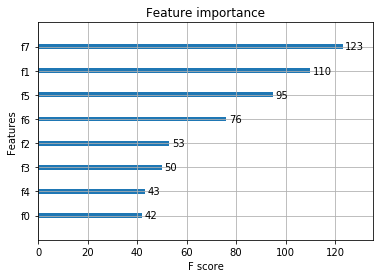

In [4]:

plot_importance(model)
pyplot.show()

In [ ]:
F0 - Number of times pregnant 
F1 - Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
F2 - Diastolic blood pressure (mm Hg) 
F3 - Triceps skin fold thickness (mm) 
F4 - 2-Hour serum insulin (mu U/ml) 
F5 - Body mass index (weight in kg/(height in m)^2) 
F6 - Diabetes pedigree function 
F7 - Age (years) 

In [5]:
X_train[:3,:]


array([[  3.00000000e+00,   1.02000000e+02,   4.40000000e+01,
          2.00000000e+01,   9.40000000e+01,   3.08000000e+01,
          4.00000000e-01,   2.60000000e+01],
       [  1.00000000e+00,   7.70000000e+01,   5.60000000e+01,
          3.00000000e+01,   5.60000000e+01,   3.33000000e+01,
          1.25100000e+00,   2.40000000e+01],
       [  9.00000000e+00,   1.24000000e+02,   7.00000000e+01,
          3.30000000e+01,   4.02000000e+02,   3.54000000e+01,
          2.82000000e-01,   3.40000000e+01]])

In [6]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)


In [7]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [8]:
accuracy = accuracy_score(y_test, predictions)

In [9]:
print("Accuracy: %.2f%%" %(accuracy * 100.00))

Accuracy: 77.95%
